<img src="files/figs/logo_ufcg.png" width=150 align="right"/>   <H1> Python Básico (para economistas) <H1/> <H5> Sérgio Rivero<H5/> Economia CH-UFCG

# Usando as Bibliotecas de Análise de Dados


  

Aqui vamos começar a utilizar algumas das principais bibliotecas do python para análise de dados. São elas:\
- Numpy
- Matplotlib
- Seaborn
- Pandas

Parte os exemplos desta aula foi inspirada na página: https://cienciadedadosuff.github.io/cursos/notebooks/caderno-3.html

Olhar as informações sobre o seaborn pode ser bem útil. Vocês podem encontrá-las aqui: https://seaborn.pydata.org/index.html



In [24]:
import matplotlib.pyplot as plt  
import seaborn as sns                                             
import numpy as np               
import pandas as pd             

## Importando os dados com o pandas

A biblioteca _pandas_ tem um conjunto de métodos para importar e tratar arquivos de diversos formatos. Vamos utilizar o _pandas_ para importar dados de uma planilha _Excel_ para uma estrutura de dados do _pandas_ (um _dataframe_).

In [25]:
ocupacao_db = pd.read_excel('files/data/desocupacao.xlsx')

Agora vamos mostrar a estrutura de dados que importamos

In [26]:
pd.DataFrame.head(ocupacao_db)

,trimestre_ano,trimestre,ano,pessoas_14a_mais,forca_de_trabalho,desocupados,nivel_desocupacao,rendimento_medio
0,1º trimestre 2012,1,2012,153601,95664,7653,5.0,2799
1,2º trimestre 2012,2,2012,154180,97010,7363,4.8,2642
2,3º trimestre 2012,3,2012,154758,97261,6942,4.5,2664
3,4º trimestre 2012,4,2012,155330,97322,6730,4.3,2684
4,1º trimestre 2013,1,2013,155902,97554,7866,5.0,2815


Vamos dar uma olhada na estrutura do nosso dataframe.

In [27]:
pd.DataFrame.info(ocupacao_db)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   trimestre_ano      43 non-null     object 
 1   trimestre          43 non-null     int64  
 2   ano                43 non-null     int64  
 3   pessoas_14a_mais   43 non-null     int64  
 4   forca_de_trabalho  43 non-null     int64  
 5   desocupados        43 non-null     int64  
 6   nivel_desocupacao  43 non-null     float64
 7   rendimento_medio   43 non-null     int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 2.8+ KB


Então, agora, estamos prontos para explorar um pouco os nossos dados. 

Inicialmente, vamos dar uma olhada nas várias séries. 

Para isso vamos fazer gráficos utilizando os nomes que temos no dataframe e a biblioteca _seaborn_

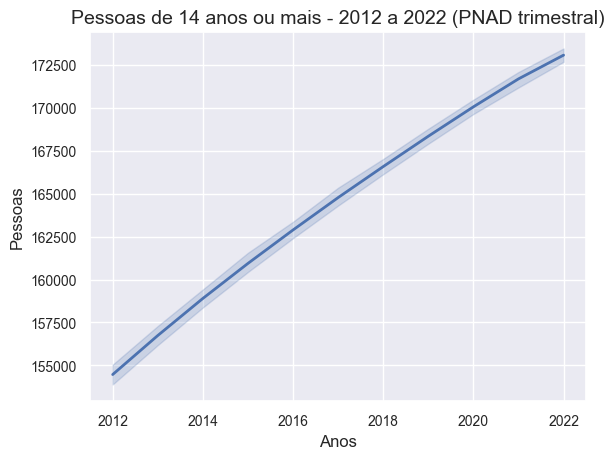

In [28]:
sns.lineplot(ocupacao_db, x='ano', y='pessoas_14a_mais',linewidth=2)

# Configurando título e rótulos dos eixos.
plt.title('Pessoas de 14 anos ou mais - 2012 a 2022 (PNAD trimestral)', fontsize=14)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('Pessoas', fontsize=12)

# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=10)

plt.show() # Para 'desenhar' o gráfico

Vamos então olhar outro gráfico. O nível de desocupação da força de trabalho no período.

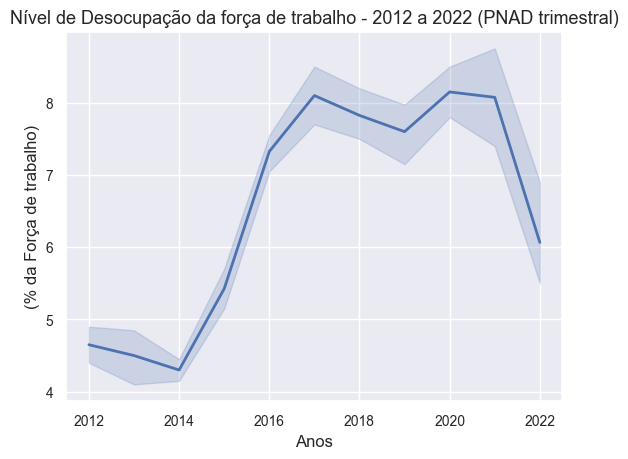

In [29]:
sns.lineplot(ocupacao_db, x='ano', y='nivel_desocupacao',linewidth=2)

# Configurando título e rótulos dos eixos.
plt.title('Nível de Desocupação da força de trabalho - 2012 a 2022 (PNAD trimestral)', fontsize=13)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('(% da Força de trabalho)', fontsize=12)

# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=10)

plt.show() # Para 'desenhar' o gráfico

Vamos ver como mudou o salário?

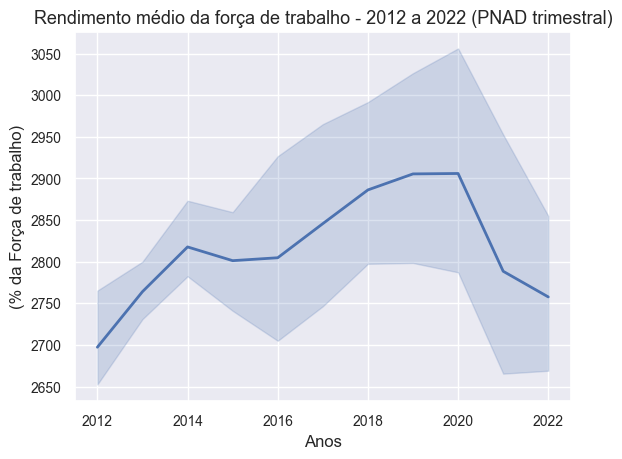

In [30]:
sns.lineplot(ocupacao_db, x='ano', y='rendimento_medio',linewidth=2)

# Configurando título e rótulos dos eixos.
plt.title('Rendimento médio da força de trabalho - 2012 a 2022 (PNAD trimestral)', fontsize=13)
plt.xlabel('Anos', fontsize=12)
plt.ylabel('(% da Força de trabalho)', fontsize=12)

# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=10)

plt.show() # Para 'desenhar' o gráfico

E a relação entre a desocupação e o rendimento? Vamos fazer um gráfico de dispersão?

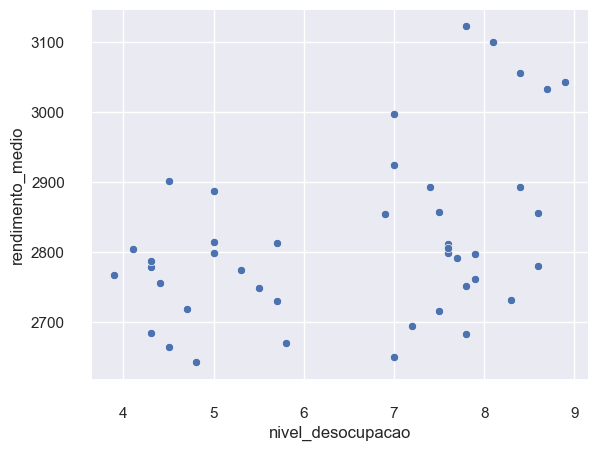

In [31]:
sns.scatterplot(x="nivel_desocupacao", 
                y="rendimento_medio",
                data= ocupacao_db);

sns.despine(offset=10, trim=True)

Vamos incluir uma reta de regressão?

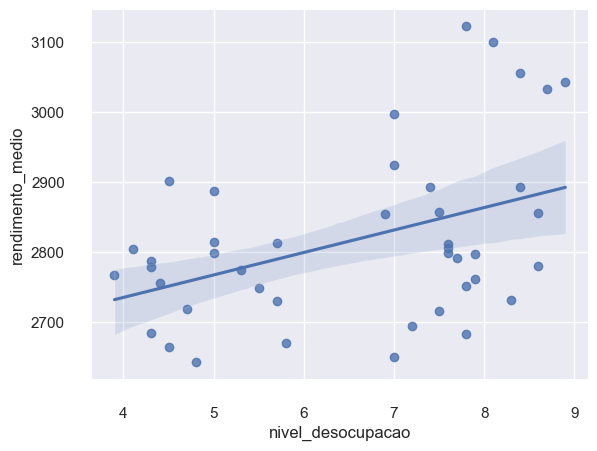

In [32]:
sns.regplot(x="nivel_desocupacao", 
                y="rendimento_medio",
                data= ocupacao_db);

sns.despine(offset=10, trim=True)

Agora fazendo um gráfico mais completo, incluindo as distribuições nas margens.

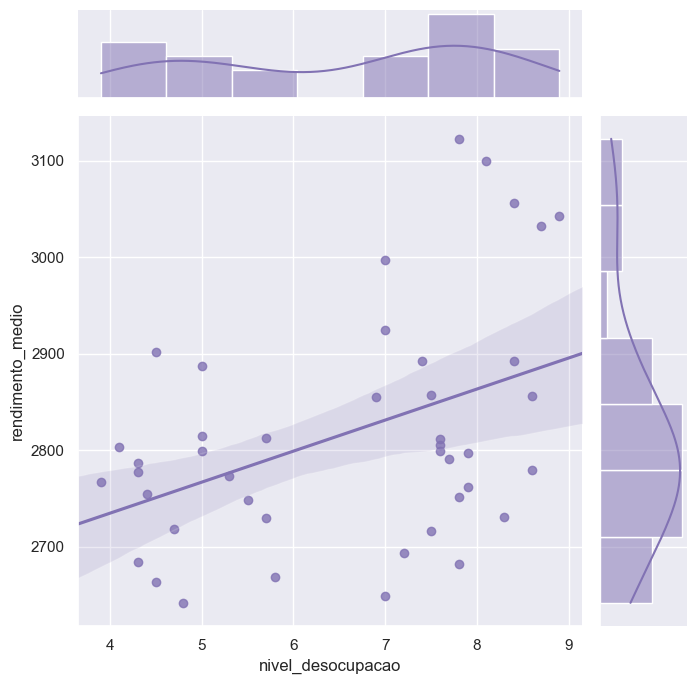

In [33]:
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="nivel_desocupacao", y="rendimento_medio", data=ocupacao_db,
                  kind="reg", truncate=False,
                  color="m", height=7)

## Executando Regressões em Python

Agora vamos executar algumas regressões em Python. Para isso, precisaremos da biblioteca _statsmodels_.

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as sfm

Agora podemos, por exemplo ver o quanto o rendimento médio depende do nível de desocupação da força de trabalho e do tamanho da força de trablho.

In [39]:

modelo1_lm = sfm.ols(formula = "rendimento_medio ~ nivel_desocupacao + forca_de_trabalho", data=ocupacao_db).fit()

Olhando os resultados

In [40]:
print(modelo1_lm.summary())

                            OLS Regression Results                            
Dep. Variable:       rendimento_medio   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     4.404
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0187
Time:                        12:45:53   Log-Likelihood:                -262.52
No. Observations:                  43   AIC:                             531.0
Df Residuals:                      40   BIC:                             536.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2722.1309    529.45

Fazendo um segundo modelo

In [41]:
modelo2_lm = sfm.ols(formula = "rendimento_medio ~ desocupados + forca_de_trabalho", data=ocupacao_db).fit()
print(modelo2_lm.summary())

                            OLS Regression Results                            
Dep. Variable:       rendimento_medio   R-squared:                       0.174
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     4.214
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0218
Time:                        12:48:03   Log-Likelihood:                -262.69
No. Observations:                  43   AIC:                             531.4
Df Residuals:                      40   BIC:                             536.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          2803.6934    550.36

Um terceiro modelo

In [ ]:
modelo3_lm = sfm.ols(formula = "rendimento_medio ~ desocupados + forca_de_trabalho", data=ocupacao_db).fit()
print(modelo3_lm.summary())


Criando os logatimos dos regressores

In [46]:
ocupacao_db["l_rendimento_medio"] = np.log(ocupacao_db["rendimento_medio"])
ocupacao_db["l_desocupados"] = np.log(ocupacao_db["desocupados"])
ocupacao_db["l_forca_de_trabalho"] = np.log(ocupacao_db["forca_de_trabalho"])

In [47]:
modelo4_lm = sfm.ols(formula = "l_rendimento_medio ~ l_desocupados + l_forca_de_trabalho", data=ocupacao_db).fit()
print(modelo4_lm.summary())


                            OLS Regression Results                            
Dep. Variable:     l_rendimento_medio   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     3.763
Date:                Wed, 21 Dec 2022   Prob (F-statistic):             0.0318
Time:                        12:56:40   Log-Likelihood:                 79.224
No. Observations:                  43   AIC:                            -152.4
Df Residuals:                      40   BIC:                            -147.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.2265    

In [48]:
modelo6_lm = sfm.ols(formula = "l_rendimento_medio ~ l_desocupados", data=ocupacao_db).fit()
print(modelo6_lm.summary())


                            OLS Regression Results                            
Dep. Variable:     l_rendimento_medio   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     7.568
Date:                Wed, 21 Dec 2022   Prob (F-statistic):            0.00880
Time:                        12:57:21   Log-Likelihood:                 79.159
No. Observations:                  43   AIC:                            -154.3
Df Residuals:                      41   BIC:                            -150.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.4077      0.195     38.077